# Computer vision - Disparity map

In [15]:
import numpy as np, matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from skimage.color import label2rgb
from skimage.filters.rank import entropy
from skimage import color, io, morphology, filters
from skimage.feature import graycomatrix, graycoprops
from skimage.segmentation import find_boundaries, mark_boundaries
import cv2

We use an algorithm to search for corresponding pixels in images based on the similarity of their surroundings. For a small region (patch) in one image, we attempt to find the most similar patch in the second image. The patch that most closely resembles it is recorded (along with its displacement) in the disparity map.

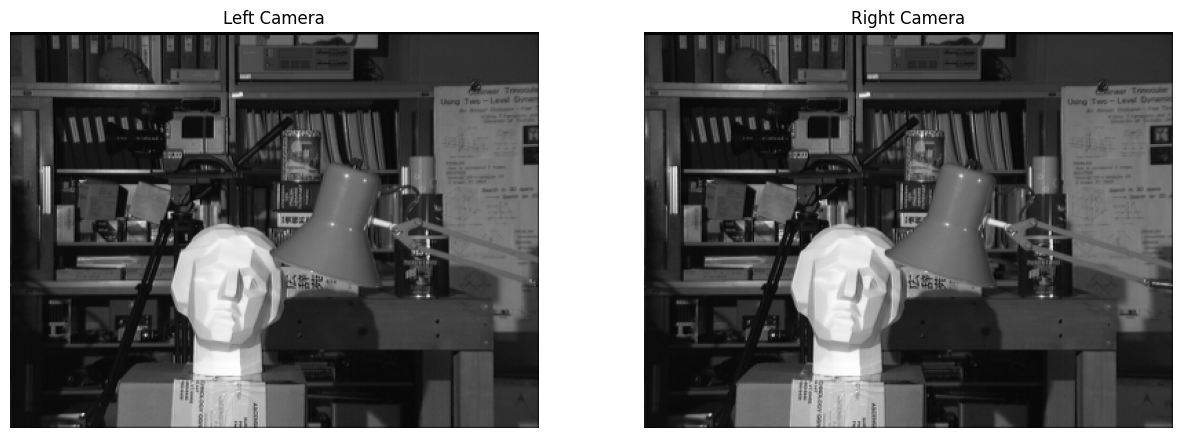

In [2]:
# Read the images
img_left = io.imread('/content/tsukubaleft.jpg')
img_right = io.imread('/content/tsukubaright.jpg')

# Display the original images
plt.figure(figsize=(15, 10))

# Plot for the left image
plt.subplot(121)
plt.title('Left Camera')
plt.imshow(img_left, cmap='gray')
plt.axis('off')

# PLot for the right image
plt.subplot(122)
plt.title('Right Camera')
plt.imshow(img_right, cmap='gray')
plt.axis('off')

plt.show()

# Setting up parameters

In [3]:
height, width = img_right.shape
dispMin = 0
dispMax = 16
window_size = 9
dispMap = np.zeros((height, width))
w = window_size // 2

> For calculating the disparity map, various metrics can be employed, such as Euclidean distance, sum of absolute differences, sum of squared differences, or Hamming distance.

In [4]:
def disparity_map(mode, img_left, img_right, dispMap, w, dispMin, dispMax):
    """
    Compute the disparity map using block matching.

    Parameters:
    - mode: String, specifies the matching mode ("norm", "abs", "square", "hamming").
    - img_left: 2D array, the left stereo image.
    - img_right: 2D array, the right stereo image.
    - dispMap: 2D array, initialized disparity map to be filled.
    - w: Integer, half of the window size for block matching.
    - dispMin: Integer, minimum disparity value.
    - dispMax: Integer, maximum disparity value.

    Returns:
    - dispMap: 2D array, the computed disparity map.
    """

    # Get image dimensions
    height, width = img_left.shape

    # Loop over image rows
    for i in tqdm(range(w, height - w), 'Image processing'):
      # Loop over image columns within the valid disparity range
      for j in range(w, width - dispMax - w):
        # Initialize variables for minimum difference and corresponding position
        min_val = np.inf
        position = 0

        # Define the rigth window in the right image
        right_window = img_right[i - w:i + w, j - w:j + w]

        # Loop over the disparity range
        for k in range(dispMin, dispMax):
          # Define the left window in the left image, shifted by disparity k
          left_window = img_left[i - w:i + w, j - w + k:j + w + k]

          # Compute the difference based on the specified mode
          if mode == 'norm':
            dif = np.sum((left_window - right_window) ** 2) ** 0.5
          elif mode == 'abs':
            dif = np.sum(np.abs(left_window - right_window))
          elif mode == 'square':
            dif = np.sum((left_window - right_window) ** 2)
          elif mode == 'hamming':
            xor = np.bitwise_xor((right_window * 255).astype(np.uint8),
                                 (left_window * 255).astype(np.uint8))
            bit_diff = np.unpackbits(xor)
            dif = np.sum(bit_diff)

          # Update minimum difference and corresponding positon
          if min_val > dif:
            min_val = dif
            position = k

        # Assign the disparity value to the disparity map at the current pixel
        dispMap[i, j] = position

    return dispMap

Image processing:   0%|          | 0/280 [00:00<?, ?it/s]

Image processing:   0%|          | 0/280 [00:00<?, ?it/s]

Image processing:   0%|          | 0/280 [00:00<?, ?it/s]

Image processing:   0%|          | 0/280 [00:00<?, ?it/s]

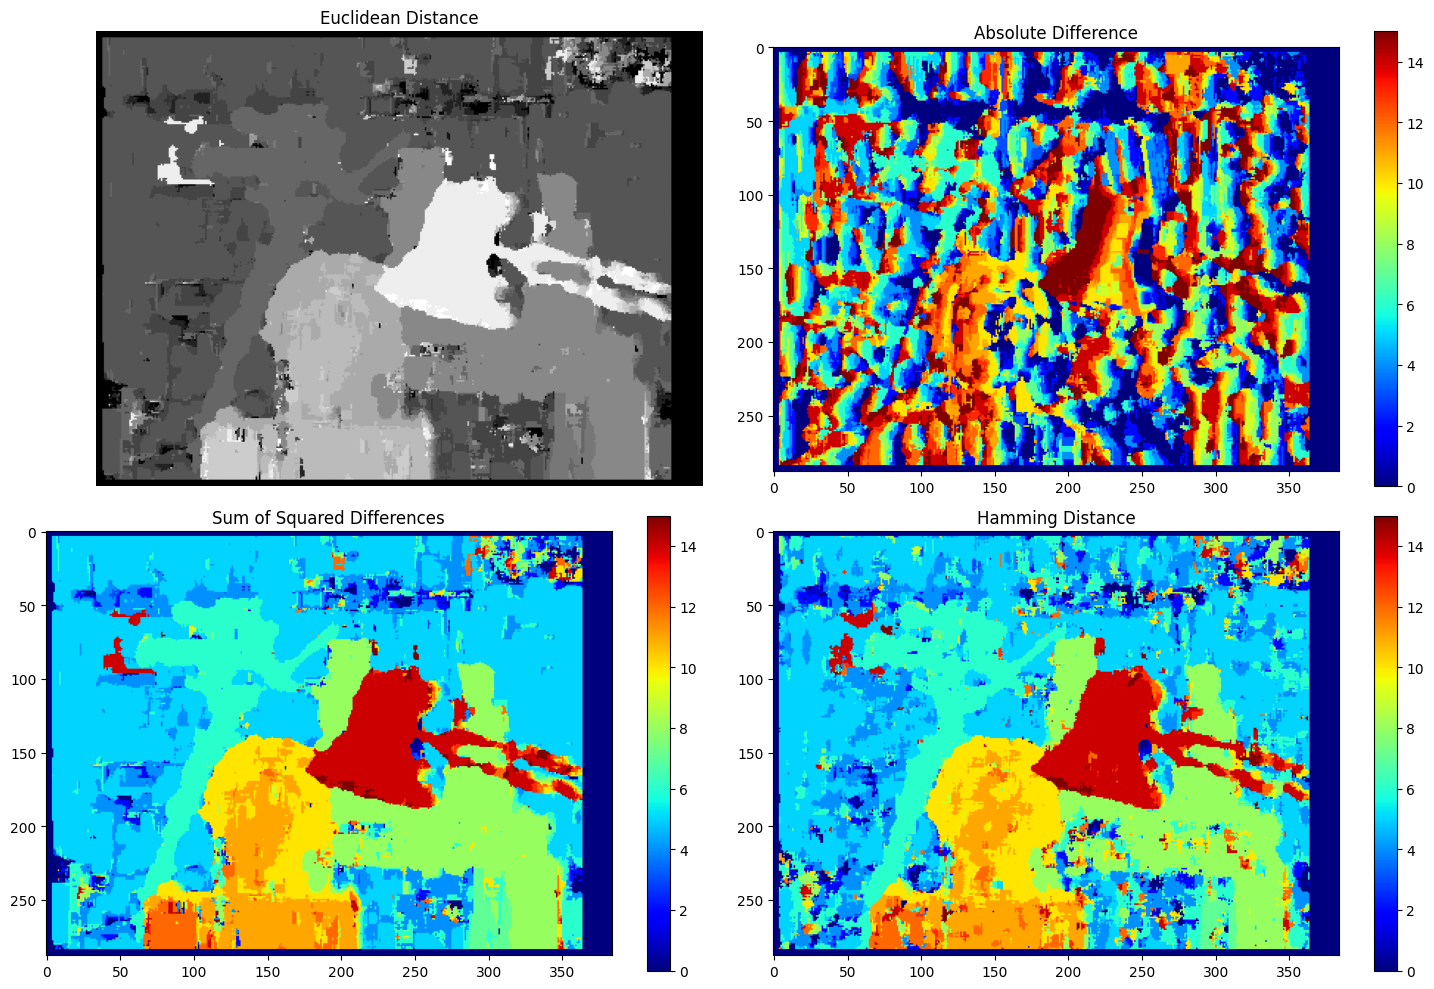

In [ ]:
plt.figure(figsize=(15, 10))

# Euclidean Distance
plt.subplot(221)
plt.title('Euclidean Distance')
plt.imshow(disparity_map('norm', img_left, img_right, dispMap, w, dispMin, dispMax), cmap='gray')
plt.axis('off')

# Absolute Difference
plt.subplot(222)
plt.title("Absolute Difference")
disparity_map_out = disparity_map("abs", img_left, img_right, dispMap, w, dispMin, dispMax)
plt.imshow(disparity_map_out, cmap='jet')
plt.colorbar()

# Sum of Squared Differences
plt.subplot(223)
plt.title("Sum of Squared Differences")
disparity_map_out = disparity_map("square", img_left, img_right, dispMap, w, dispMin, dispMax)
plt.imshow(disparity_map_out, cmap='jet')
plt.colorbar()

# Hamming Distance
plt.subplot(224)
plt.title("Hamming Distance")
disparity_map_out = disparity_map("hamming", img_left, img_right, dispMap, w, dispMin, dispMax)
plt.imshow(disparity_map_out, cmap='jet')
plt.colorbar()

plt.tight_layout()
plt.show()

Image processing:   0%|          | 0/286 [00:00<?, ?it/s]

Image processing:   0%|          | 0/284 [00:00<?, ?it/s]

Image processing:   0%|          | 0/278 [00:00<?, ?it/s]

Image processing:   0%|          | 0/274 [00:00<?, ?it/s]

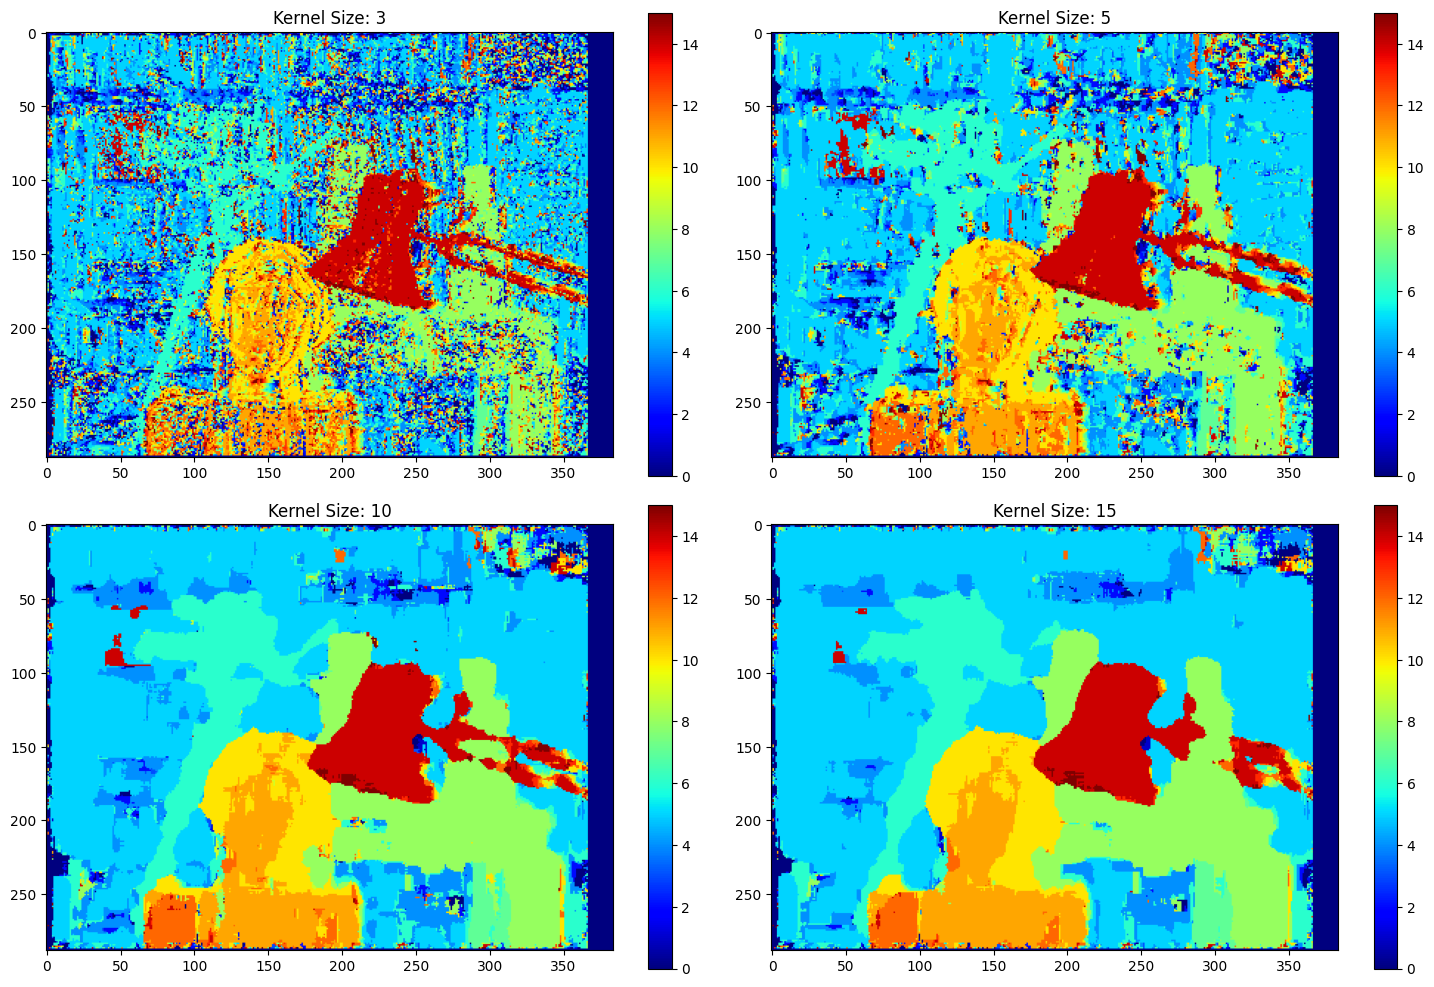

In [ ]:
# Demonstrate with different kernel sizes
kernel_sizes = [3, 5, 10, 15]

plt.figure(figsize=(15, 10))

for i, kernel_size in enumerate(kernel_sizes, start=1):
  plt.subplot(2, 2, i)

  plt.title(f"Kernel Size: {kernel_size}")
  w = kernel_size // 2

  # Compute disparity map using the specified kernel size
  disparity_map_out = disparity_map("norm", img_left, img_right, dispMap, w, dispMin, dispMax)

  # Display the disparity map
  plt.imshow(disparity_map_out, cmap='jet')
  plt.colorbar()

plt.tight_layout()
plt.show()

# Task
Try and implement your own metrics for block matching search - for example use the pattern search method used in the lab excercises on Convolution and Fourier transform. Remember that the method works well on high contrast images only, consider contrast enhancement of the blocks, canny edge detection, thresholding ...

Also, keep in mind: if you are a using difference measure - the lower the better, as above, or a similarity measure - the higher the better, as in convolution.

In [19]:
def disparity_map(mode, img_left, img_right, dispMap, w, dispMin, dispMax):
    """
    Compute the disparity map using block matching.

    Parameters:
    - mode: String, specifies the matching mode ("norm", "abs", "square", "hamming").
    - img_left: 2D array, the left stereo image.
    - img_right: 2D array, the right stereo image.
    - dispMap: 2D array, initialized disparity map to be filled.
    - w: Integer, half of the window size for block matching.
    - dispMin: Integer, minimum disparity value.
    - dispMax: Integer, maximum disparity value.

    Returns:
    - dispMap: 2D array, the computed disparity map.
    """

    # Get image dimensions
    height, width = img_left.shape

    # Loop over image rows
    for i in tqdm(range(w, height - w), 'Image processing'):
      # Loop over image columns within the valid disparity range
      for j in range(w, width - dispMax - w):
        # Initialize variables for minimum difference and corresponding position
        min_val = np.inf
        position = 0

        # Define the rigth window in the right image
        right_window = img_right[i - w:i + w, j - w:j + w]

        # Loop over the disparity range
        for k in range(dispMin, dispMax):
          # Define the left window in the left image, shifted by disparity k
          left_window = img_left[i - w:i + w, j - w + k:j + w + k]

          # Compute the difference based on the specified mode
          if mode == 'convolution':
            left_edges = cv2.Sobel(left_window, cv2.CV_64F, 1, 1, ksize=3)
            right_edges = cv2.Sobel(right_window, cv2.CV_64F, 1, 1, ksize=3)
            dif = np.sum(np.abs(left_edges - right_edges))
          if mode == 'fourier':
            dif =  np.sum(np.abs(np.fft.fft2(left_window) - np.fft.fft2(right_window)))

          # Update minimum difference and corresponding positon
          if min_val > dif:
            min_val = dif
            position = k

        # Assign the disparity value to the disparity map at the current pixel
        dispMap[i, j] = position

    return dispMap

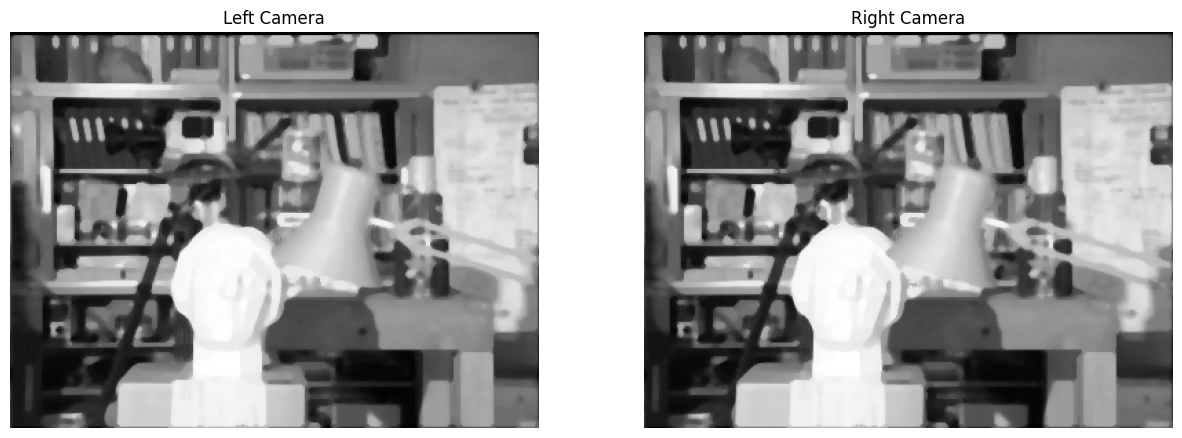

In [10]:
from skimage import io, exposure

# Contrast enchancement
image_right_equalized = exposure.equalize_hist(img_right)
image_left_equalized = exposure.equalize_hist(img_left)

# Using median filter
image_right_equalized = filters.median(image_right_equalized, morphology.disk(3))
image_left_equalized = filters.median(image_left_equalized, morphology.disk(3))

# Plot images
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Left Camera')
plt.imshow(image_left_equalized, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Right Camera')
plt.imshow(image_right_equalized, cmap='gray')
plt.axis('off')

plt.show()

In [28]:
w = 15 // 2

Image processing:   0%|          | 0/274 [00:00<?, ?it/s]

Image processing:   0%|          | 0/274 [00:00<?, ?it/s]

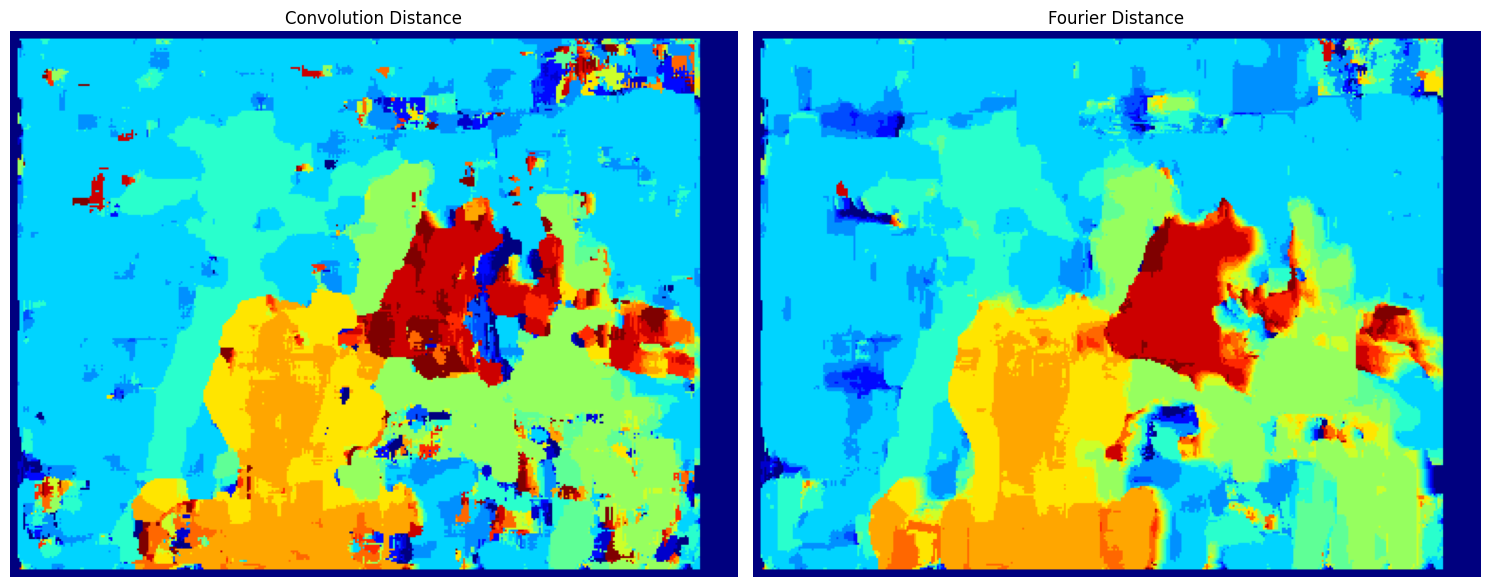

In [29]:
plt.figure(figsize=(15, 10))

# Using Convolution Distance
plt.subplot(121)
plt.title('Convolution Distance')
plt.imshow(disparity_map('convolution', image_left_equalized, image_right_equalized, dispMap, w, dispMin, dispMax), cmap='jet')
plt.axis('off')

# Using Fourier Distance
plt.subplot(122)
plt.title('Fourier Distance')
plt.imshow(disparity_map('fourier', image_left_equalized, image_right_equalized, dispMap, w, dispMin, dispMax), cmap='jet')
plt.axis('off')

plt.tight_layout()
plt.show()